<a href="https://colab.research.google.com/github/torrozz/Graduation/blob/main/Graduation_verLung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# C√†i ƒë·∫∑t th∆∞ vi·ªán Kaggle CLI
!pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()  # T·∫£i l√™n file kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nguyntntjason","key":"a77661f4fc309da9ac836ae66d9cbd10"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# T·∫£i dataset ung th∆∞ ph·ªïi t·ª´ Kaggle
!kaggle datasets download -d andrewmvd/lung-and-colon-cancer-histopathological-images


Dataset URL: https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images
License(s): CC-BY-SA-4.0
 99% 1.74G/1.76G [00:13<00:00, 252MB/s]
100% 1.76G/1.76G [00:13<00:00, 143MB/s]


In [ ]:
# Gi·∫£i n√©n dataset
!unzip -q lung-and-colon-cancer-histopathological-images.zip -d lung_colon_data


In [ ]:
# C√†i ƒë·∫∑t th∆∞ vi·ªán fastai n·∫øu ch∆∞a c√≥
!pip install -q fastai

# Import th∆∞ vi·ªán c·∫ßn thi·∫øt
from fastai.vision.all import *
import pandas as pd
from pathlib import Path


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 109.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 96.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 58.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [ ]:
# =================================================================
# B∆Ø·ªöC 1: T·∫†O DATASET LUNG V·ªöI 2 CLASSES (CANCER + NORMAL)
# =================================================================

# ƒê∆∞·ªùng d·∫´n g·ªëc v√† ƒë√≠ch
src_path = "lung_colon_data/lung_colon_image_set/lung_image_sets"
dst_path = "lung_data"

# X√≥a th∆∞ m·ª•c c≈© n·∫øu t·ªìn t·∫°i v√† t·∫°o m·ªõi
if os.path.exists(dst_path):
    shutil.rmtree(dst_path)

# T·∫°o c·∫•u tr√∫c th∆∞ m·ª•c m·ªõi
os.makedirs(dst_path)
os.makedirs(os.path.join(dst_path, "cancer"))  # G·ªôp aca + scc
os.makedirs(os.path.join(dst_path, "normal"))  # lung_n

print("üìÅ ƒêang t·∫°o dataset lung v·ªõi 2 classes...")

# Copy lung_n (normal) v√†o th∆∞ m·ª•c normal
lung_n_src = os.path.join(src_path, "lung_n")
lung_n_dst = os.path.join(dst_path, "normal")
if os.path.exists(lung_n_src):
    for img_file in os.listdir(lung_n_src):
        shutil.copy2(os.path.join(lung_n_src, img_file), os.path.join(lung_n_dst, img_file))
    print(f"‚úÖ Copied lung_n: {len(os.listdir(lung_n_dst))} images")

# Copy lung_aca (adenocarcinoma) v√†o th∆∞ m·ª•c cancer
lung_aca_src = os.path.join(src_path, "lung_aca")
cancer_dst = os.path.join(dst_path, "cancer")
if os.path.exists(lung_aca_src):
    for img_file in os.listdir(lung_aca_src):
        # Th√™m prefix "aca_" ƒë·ªÉ tr√°nh tr√πng t√™n file
        new_name = f"aca_{img_file}"
        shutil.copy2(os.path.join(lung_aca_src, img_file), os.path.join(cancer_dst, new_name))
    print(f"‚úÖ Copied lung_aca: {len([f for f in os.listdir(cancer_dst) if f.startswith('aca_')])} images")

# Copy lung_scc (squamous cell carcinoma) v√†o th∆∞ m·ª•c cancer
lung_scc_src = os.path.join(src_path, "lung_scc")
if os.path.exists(lung_scc_src):
    for img_file in os.listdir(lung_scc_src):
        # Th√™m prefix "scc_" ƒë·ªÉ tr√°nh tr√πng t√™n file
        new_name = f"scc_{img_file}"
        shutil.copy2(os.path.join(lung_scc_src, img_file), os.path.join(cancer_dst, new_name))
    print(f"‚úÖ Copied lung_scc: {len([f for f in os.listdir(cancer_dst) if f.startswith('scc_')])} images")

# Ki·ªÉm tra k·∫øt qu·∫£ final
print("\nüìä DATASET SUMMARY:")
for label in os.listdir(dst_path):
    label_path = os.path.join(dst_path, label)
    if os.path.isdir(label_path):
        num_images = len(os.listdir(label_path))
        print(f"{label}: {num_images} images")

total_images = sum(len(os.listdir(os.path.join(dst_path, label)))
                  for label in os.listdir(dst_path)
                  if os.path.isdir(os.path.join(dst_path, label)))
print(f"Total: {total_images} images")

# =================================================================

üìÅ ƒêang t·∫°o dataset lung v·ªõi 2 classes...
‚úÖ Copied lung_n: 5000 images
‚úÖ Copied lung_aca: 5000 images
‚úÖ Copied lung_scc: 5000 images

üìä DATASET SUMMARY:
normal: 5000 images
cancer: 10000 images
Total: 15000 images



üîÑ Creating DataLoaders...
Classes: ['cancer', 'normal']
Training samples: 12000
Validation samples: 3000

üñºÔ∏è Sample batch:


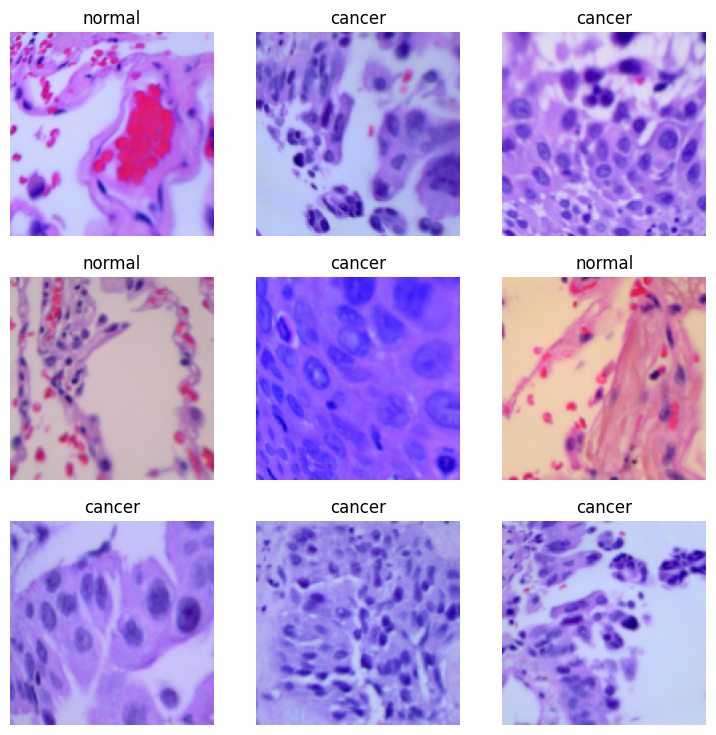

In [ ]:
# B∆Ø·ªöC 2: T·∫†O DATALOADERS (GI·ªêNG NHU CODE COLON C·ª¶A B·∫†N)
# =================================================================

print("\nüîÑ Creating DataLoaders...")

dls = ImageDataLoaders.from_folder(
    "lung_data",
    valid_pct=0.2,        # 20% cho validation
    seed=42,              # ƒê·∫£m b·∫£o reproducibility
    item_tfms=Resize(224), # Resize t·∫•t c·∫£ ·∫£nh v·ªÅ 224x224
    batch_tfms=aug_transforms(
        flip_vert=True,       # L·∫≠t d·ªçc
        max_rotate=20,        # Xoay ·∫£nh t·ªëi ƒëa ¬±20 ƒë·ªô
        max_zoom=1.2,         # Ph√≥ng to ·∫£nh t·ªëi ƒëa 20%
        max_lighting=0.3,     # TƒÉng gi·∫£m ƒë·ªô s√°ng t·ªëi
        max_warp=0.3,         # L√†m bi·∫øn d·∫°ng nh·∫π
        p_affine=0.75,        # X√°c su·∫•t √°p d·ª•ng bi·∫øn d·∫°ng h√¨nh h·ªçc
        p_lighting=0.75       # X√°c su·∫•t thay ƒë·ªïi √°nh s√°ng
    ),
    bs=32
)

# Xem l·∫°i c√°c nh√£n
print("Classes:", dls.vocab)
print(f"Training samples: {len(dls.train_ds)}")
print(f"Validation samples: {len(dls.valid_ds)}")

# Hi·ªÉn th·ªã m·ªôt batch m·∫´u
print("\nüñºÔ∏è Sample batch:")
dls.show_batch(max_n=9)

# =================================================================


üöÄ Initializing model...


/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 97.8M/97.8M [00:01<00:00, 66.4MB/s]



üìà Finding optimal learning rate...



üéØ Starting training...


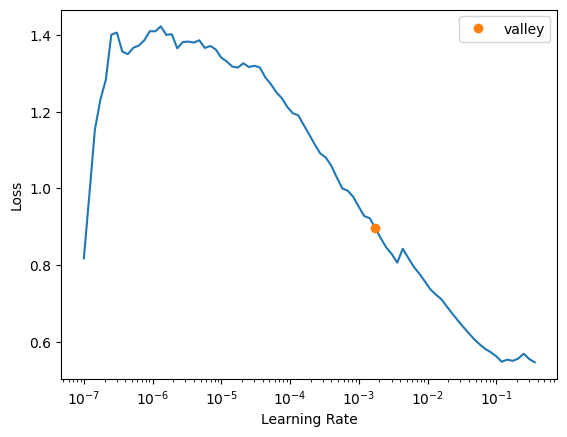

In [ ]:
# B∆Ø·ªöC 3: TRAINING MODEL (GI·ªêNG NHU CODE COLON C·ª¶A B·∫†N)
# =================================================================

print("\nüöÄ Initializing model...")

# Kh·ªüi t·∫°o m√¥ h√¨nh v·ªõi ResNet50
learn = cnn_learner(dls, resnet50, metrics=accuracy)

# T√¨m learning rate t·ªëi ∆∞u
print("\nüìà Finding optimal learning rate...")
learn.lr_find()

# Fine-tune model v·ªõi learning rate ƒë∆∞·ª£c ƒë·ªÅ xu·∫•t
print("\nüéØ Starting training...")
learn.fine_tune(5, base_lr=2e-3)



üìä Model Evaluation:



Most confused predictions:



üíæ Saving model...
‚úÖ Model saved as 'lung_cancer_model.pkl'

üéâ TRAINING COMPLETED!
üìã Summary:
- Dataset: Lung images (Cancer vs Normal)
- Cancer class: lung_aca + lung_scc (10,000 images)
- Normal class: lung_n (5,000 images)
- Architecture: ResNet50 with transfer learning
- Training: 5 epochs fine-tuning
- Model saved: lung_cancer_model.pkl


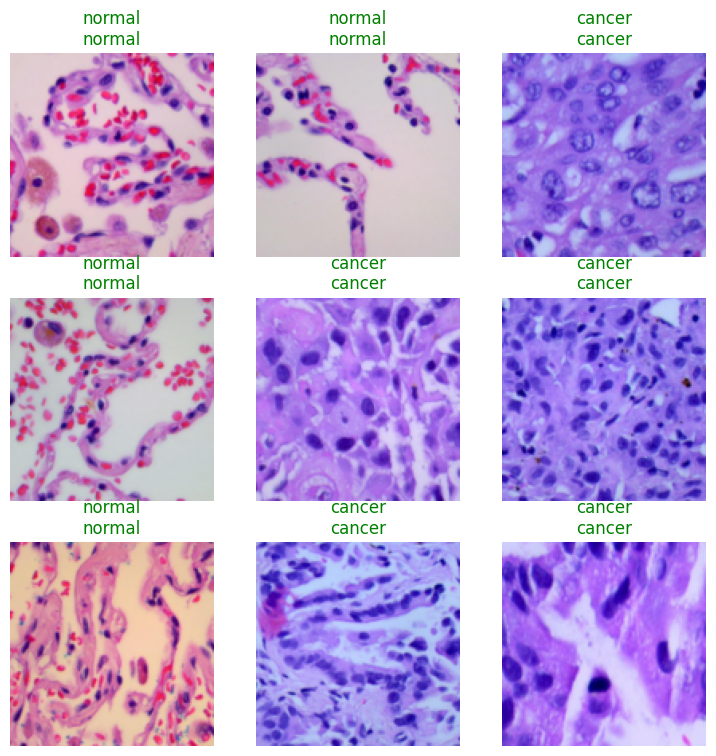

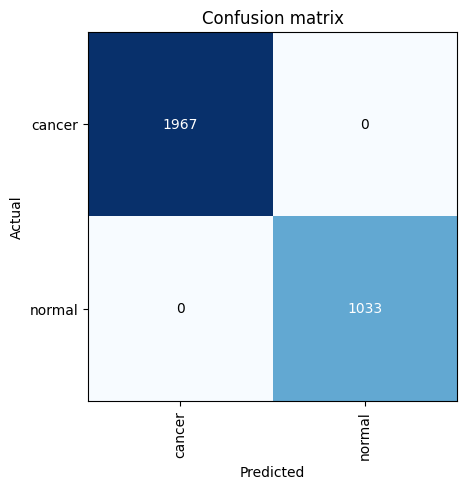

In [ ]:
# B∆Ø·ªöC 4: ƒê√ÅNH GI√Å MODEL
# =================================================================

print("\nüìä Model Evaluation:")

# Hi·ªÉn th·ªã k·∫øt qu·∫£ predictions
learn.show_results()

# T·∫°o confusion matrix v√† analysis
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# Xem nh·ªØng tr∆∞·ªùng h·ª£p model confused nh·∫•t
print("\nMost confused predictions:")
interp.most_confused(min_val=2)

# L∆∞u model
print("\nüíæ Saving model...")
learn.export('lung_cancer_model.pkl')
print("‚úÖ Model saved as 'lung_cancer_model.pkl'")

print("\nüéâ TRAINING COMPLETED!")
print("üìã Summary:")
print("- Dataset: Lung images (Cancer vs Normal)")
print("- Cancer class: lung_aca + lung_scc (10,000 images)")
print("- Normal class: lung_n (5,000 images)")
print("- Architecture: ResNet50 with transfer learning")
print("- Training: 5 epochs fine-tuning")
print("- Model saved: lung_cancer_model.pkl")

In [ ]:
learn.export('/content/lung_cancer_model.pkl')

üì§ Upload ·∫£nh b·∫•t k·ª≥ (png/jpg/tif...)


Saving lungn48.jpeg to lungn48.jpeg


üîç K·∫øt qu·∫£ d·ª± ƒëo√°n: normal
üî¥ C√≥ ung th∆∞ (cancer): 0.0000 | üü¢ Kh√¥ng ung th∆∞ (normal): 1.0000


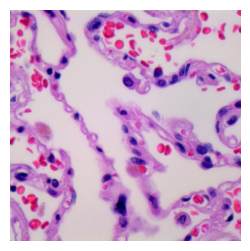

In [ ]:
from fastai.vision.all import *
from google.colab import files
from PIL import Image

# --- 1. Load m√¥ h√¨nh colon ---
learn_inf = load_learner("/content/lung_cancer_model.pkl")  # ƒê·∫£m b·∫£o ƒë√∫ng ƒë∆∞·ªùng d·∫´n model

# --- 2. Upload ·∫£nh ---
print("üì§ Upload ·∫£nh b·∫•t k·ª≥ (png/jpg/tif...)")
uploaded_img = files.upload()
img_filename = next(iter(uploaded_img))  # L·∫•y t√™n file

# --- 3. N·∫øu l√† ·∫£nh .tif th√¨ chuy·ªÉn sang RGB ---
img_ext = img_filename.split('.')[-1].lower()

if img_ext == 'tif':
    img_raw = Image.open(img_filename).convert('RGB')
    tif_path = img_filename.rsplit('.', 1)[0] + ".tif"
    img_raw.save(tif_path)
    img_filename = tif_path  # C·∫≠p nh·∫≠t l·∫°i t√™n file

# --- 4. D·ª± ƒëo√°n ---
img = PILImage.create(img_filename)
pred_class, pred_idx, probs = learn_inf.predict(img)

# --- 5. Hi·ªÉn th·ªã ---
img.show(figsize=(3,3))
print(f"üîç K·∫øt qu·∫£ d·ª± ƒëo√°n: {pred_class}")
print(f"üî¥ C√≥ ung th∆∞ (cancer): {probs[0]:.4f} | üü¢ Kh√¥ng ung th∆∞ (normal): {probs[1]:.4f}")
